In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
def position(y_n,alpha,E):
    #want to get y(n+1), so position in well after a step, given y(n), the previous position, alpha, and E
    #also need random sample to be from gaussian distribution
    return y_n + alpha*E*y_n *(1-y_n**2)+ np.sqrt(alpha/2)*np.random.normal()



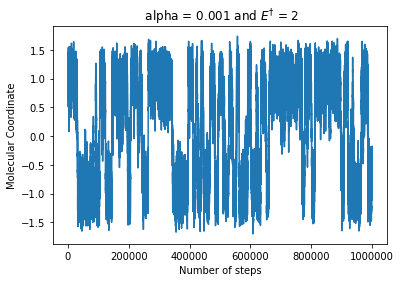

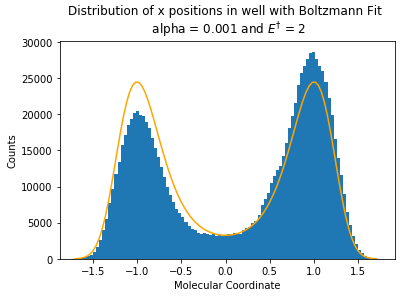

1665


1665

In [3]:
#want to plot time (will just use number of steps) vs molecular coordinate, as in Figure 4.2 in the book
def boltzmann(y,V_0,V_1):
    return V_1*np.exp(-V_0*(1-y**2)**2)
#want array of positions that take the previous output as an input

def plot_positions(n, alpha, E):
    num_crosses = 0
    num_steps = np.arange(0,n,1)
    y_0 = 1 #define starting point 
    positions = []
    for step_i in range(0,len(num_steps)-1):
        if step_i == 0: y_n = y_0
        y_nplus1 = position(y_n,alpha, E)
        new_position = y_nplus1
        if (y_n > 0 and new_position < 0) or (y_n <0 and new_position > 0): num_crosses = num_crosses + 1
        positions.append(new_position)
        y_n = y_nplus1
    plt.figure()
    plt.plot(num_steps[:-1],positions)
    plt.xlabel('Number of steps')
    plt.ylabel('Molecular Coordinate')
    plt.title(' alpha = '+ str(alpha)+ ' and $E^{\dagger}$ = '+ str(E))
    plt.show()
    
    
    
    #also want to fit this with the defined boltzmann distribution using curve_fit
    plt.figure()
    hist, bin_edges, patches = plt.hist(positions, bins = 100)
    popt_boltz, pcov_boltz = curve_fit(boltzmann, bin_edges[:-1],hist)
    plt.plot(bin_edges[:-1], boltzmann(bin_edges[:-1],popt_boltz[0],popt_boltz[1]),color = 'orange')
    plt.xlabel('Molecular Coordinate')
    plt.ylabel('Counts')
    plt.title('Distribution of x positions in well with Boltzmann Fit \n'+ ' alpha = '+ str(alpha)+ ' and $E^{\dagger}$ = '+ str(E))
    plt.show()
    print(num_crosses)
    
    return num_crosses
    
    
    
plot_positions(1000000, .001, 2)


    



How small do you need to make $\alpha$ before the results start to make sense? What do you check to see whether $\alpha$ is small enough? Alpha appeared to be small enough when the fits started looking better. 

What happens when you change E? For each value of E, run simulation long enough so that distribution of x is given by the Boltzmann distribution.

In [4]:
E_values = [0.25, 0.5, 1, 2, 3, 4, 5, 6]

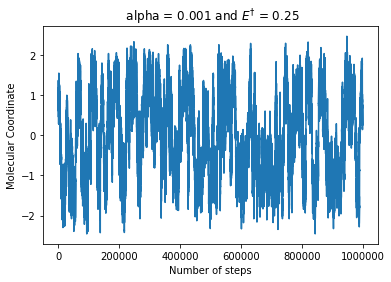

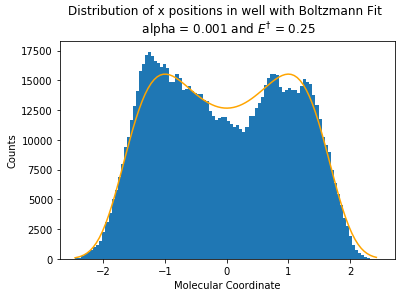

4168


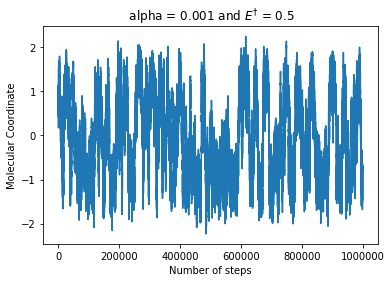

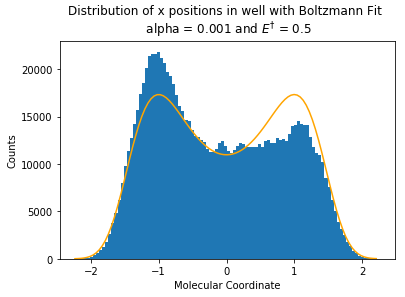

4607


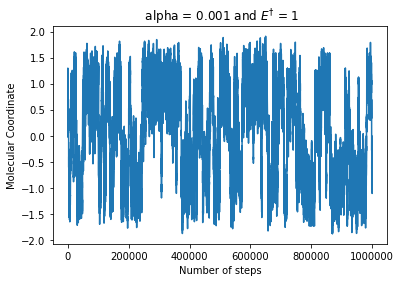

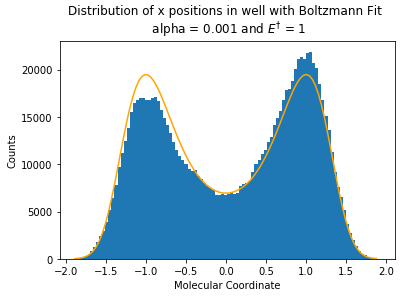

3211


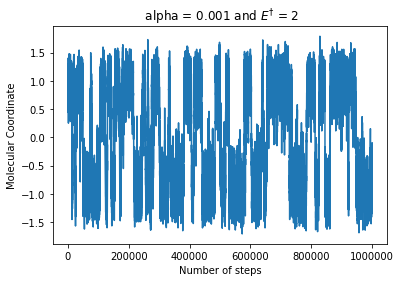

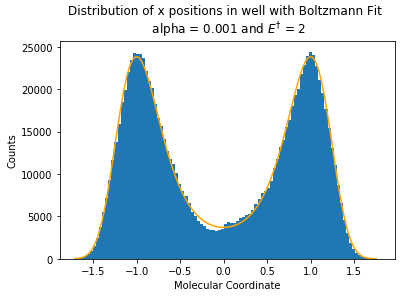

1933


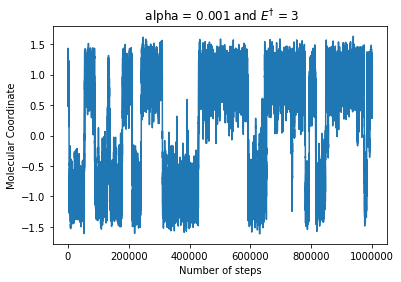

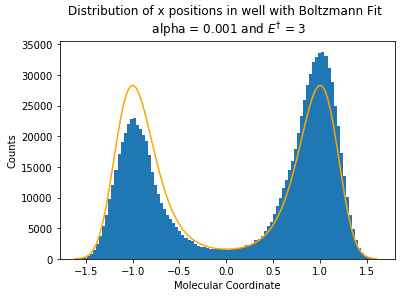

862


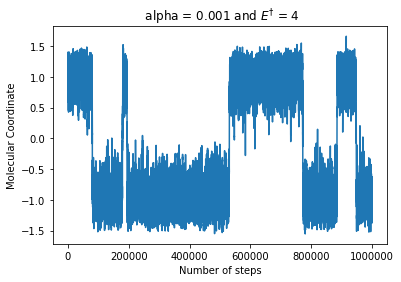

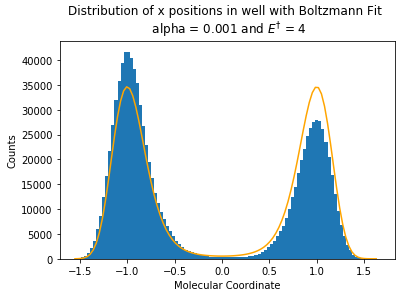

225


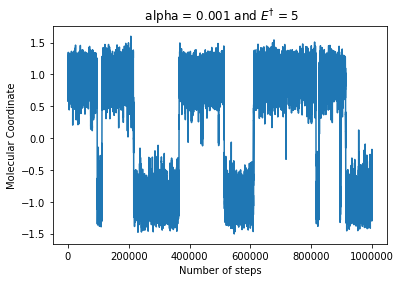

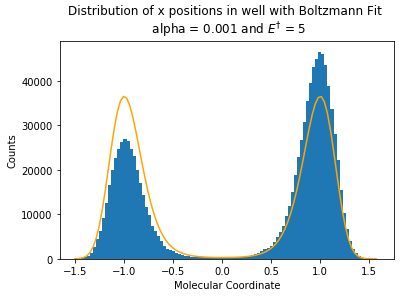

197


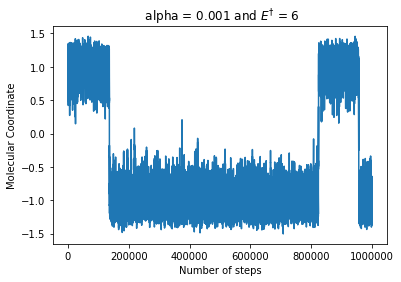

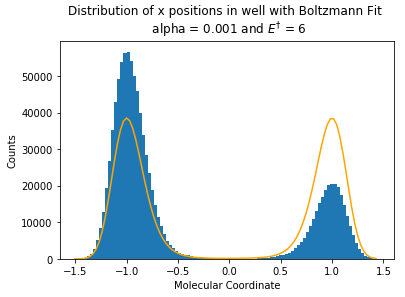

35


In [5]:
rate = []
for E_i in range(0,len(E_values)):
    crosses = plot_positions(1000000, .001, E_values[E_i])
    rate.append(crosses)

In [15]:
print(rate)
print(E_values)

[4168, 4607, 3211, 1933, 862, 225, 197, 35]
[0.25, 0.5, 1, 2, 3, 4, 5, 6]


In [20]:
def exponential(x, a, b, c):
    return (a * np.exp(-b * np.array(x)) + c)

[ 5.74187992e+03  4.37332340e-01 -5.28914409e+02]


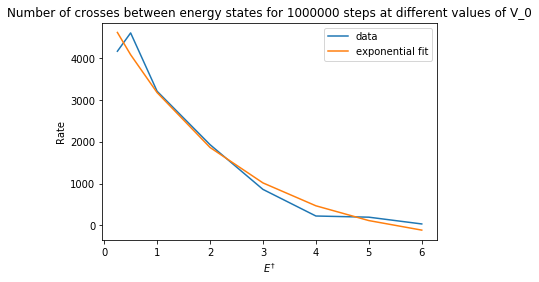

In [24]:
plt.plot(E_values, rate,label = 'data')
plt.xlabel('$E^{\dagger}$')
plt.ylabel('Rate')
plt.title('Number of crosses between energy states for 1000000 steps at different values of V_0')

popt_exponential, pcov_exponential = curve_fit(exponential, E_values, rate)
print(popt_exponential)
plt.plot(E_values, exponential(E_values, popt_exponential[0], popt_exponential[1], popt_exponential[2]),label = 'exponential fit')
plt.legend(loc="upper right")
plt.show()

As we expect, as the potential increases, the particle is no longer able to jump between states as frequently. 

This plot verifies the Arrhenius law, as the Rate falls proportionately to $e^\frac{-V_0}{k_B T}$. 